# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Dataset

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
features_lists=list(df.columns)[:-1]

In [ ]:
features_lists

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
described_features=df.describe()

In [ ]:
described_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
for feature in features_lists:
    print('Feature '+feature)
    print('mean')
    print(described_features[feature]['mean'])
    print('std')
    print(described_features[feature]['std'])
    print('min')
    print(described_features[feature]['min'])
    print('max')
    print(described_features[feature]['max'])
    print('*****************')

Feature Pregnancies
mean
3.8450520833333335
std
3.3695780626988623
min
0.0
max
17.0
*****************
Feature Glucose
mean
120.89453125
std
31.97261819513622
min
0.0
max
199.0
*****************
Feature BloodPressure
mean
69.10546875
std
19.355807170644777
min
0.0
max
122.0
*****************
Feature SkinThickness
mean
20.536458333333332
std
15.952217567727677
min
0.0
max
99.0
*****************
Feature Insulin
mean
79.79947916666667
std
115.24400235133837
min
0.0
max
846.0
*****************
Feature BMI
mean
31.992578124999998
std
7.8841603203754405
min
0.0
max
67.1
*****************
Feature DiabetesPedigreeFunction
mean
0.47187630208333325
std
0.33132859501277484
min
0.078
max
2.42
*****************
Feature Age
mean
33.240885416666664
std
11.76023154067868
min
21.0
max
81.0
*****************


In [ ]:
Outcome_list=df['Outcome']

Characteristics

# Create Plots

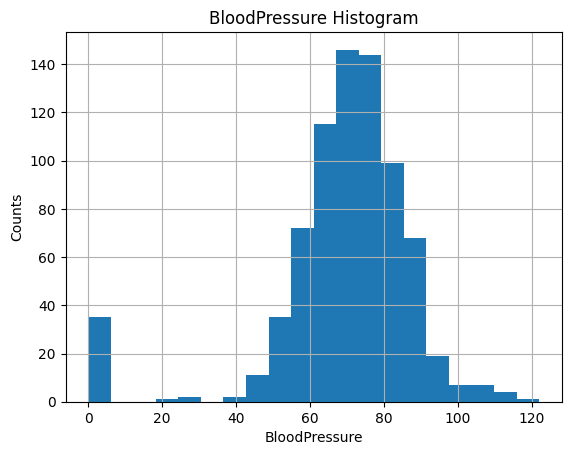

In [ ]:
df[features_lists[2]].hist(bins=20)
plt.title(features_lists[2] + ' Histogram')
plt.xlabel(features_lists[2])
plt.ylabel('Counts')
plt.show()

# Convert DataFrame to Numpy arrays

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

Train Samples: 691
Test Samples: 77

In [ ]:
seed = 0
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((691, 8), (691,), (77, 8), (77,))

# Create a Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test set

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 87.01


# Visualizing Coefficients

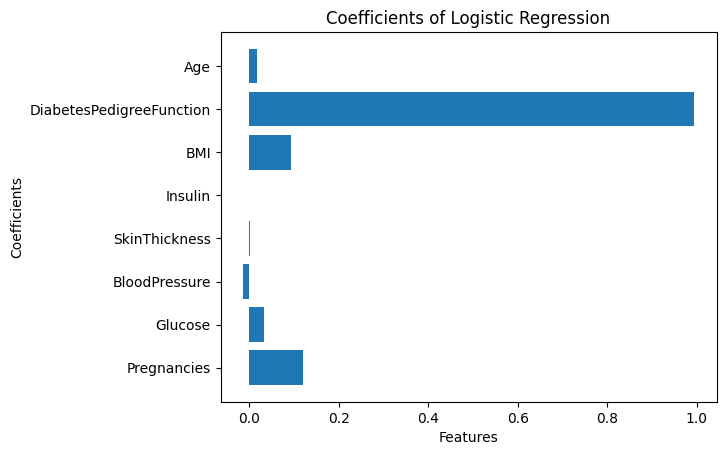

In [ ]:
features = input_df.columns
coefficients = model.coef_[0]

plt.barh(input_df.columns, coefficients)
plt.title('Coefficients of Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

# Feature Importance

The larger the absolute weight value, the better

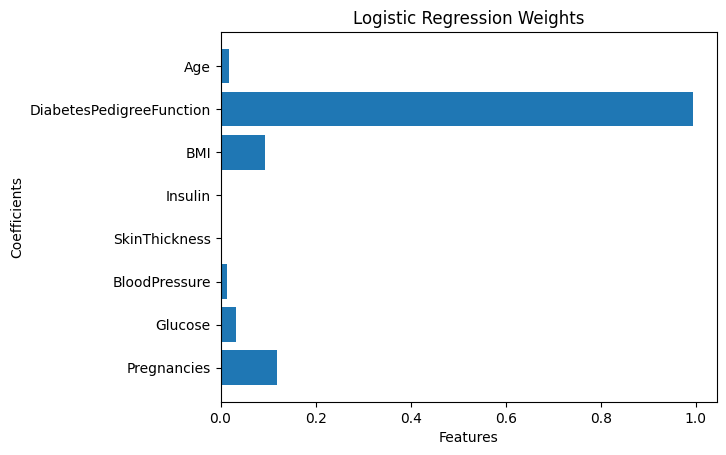

In [ ]:
plt.barh(input_df.columns, np.abs(coefficients))
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()